In [17]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

Found 998 images belonging to 2 classes.


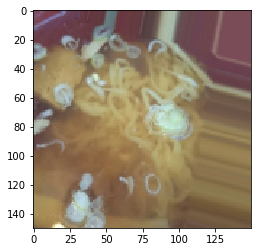

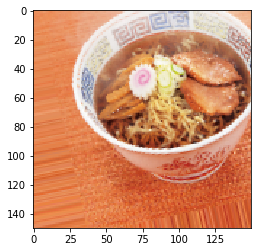

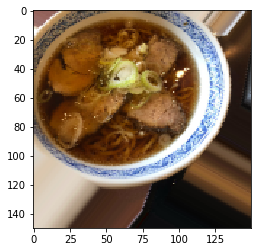

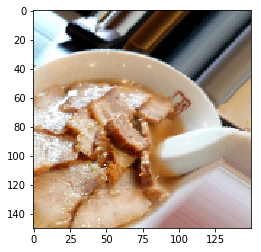

In [42]:
train_data_dir = 'train_images'
img_rows, img_cols = 150, 150
classes = ['kitakata', 'sano']
batch_size = 10
from keras.preprocessing import image

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

i = 0
for batch_tuple in train_generator:
    # batch_tupleは、長さ2のtuple型のオブジェクト
    # 第1要素は (10, 150, 150, 3)  (10はバッチサイズであり、バッチサイズが2の場合は2となる)
    # 第2要素は (10, 2)であり、カテゴリを表す one-hot表現 (こちらも第1要素はバッチサイズ。)
    # [0, 1] の場合、sano、 [1, 0]の場合 kitakata
    
    # random_imagesは4次のテンソルであり、shapeは (10, 150, 150, 3)
    random_images = batch_tuple[0]
    # random_imageのbatch = 1を取得。  shapeは (150, 150, 3)
    random_image = random_images[0]
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(random_image))
    i += 1
    if i % 4 == 0:
        break

# 画像をランダムに変換

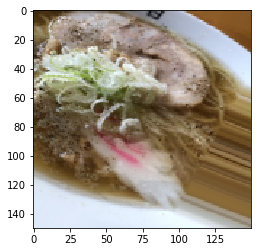

In [47]:
sano_dir = os.path.join(train_data_dir, 'sano')
fnames = [os.path.join(sano_dir, fname) for fname in os.listdir(sano_dir)]
image_path = fnames[5]
# 画像を150 * 150のサイズに変更
img = image.load_img(image_path, target_size=(150, 150))
x = image.img_to_array(img)
# 画像をランダムに変換
x_trans = train_datagen.random_transform(x)
imgplot = plt.imshow(image.array_to_img(x_trans))